In [1]:
import ROOT
import sys
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py as h5
sys.path.append("../utils/")
import read_ROOT_hists
import read_integral_hdf5s
import read_raw_waveforms_hdf5s

In [2]:
import importlib
importlib.reload(read_ROOT_hists)

<module 'read_ROOT_hists' from '/storage/af/user/aalbert/SM_QAQC_Results/Plotting_Scripts/../utils/read_ROOT_hists.py'>

### Test Averaged LY, SRC Charge, and SPE Charge Results (from ROOT Files)

In [3]:
module_str = "32110020008497"

In [4]:
TFileList = read_ROOT_hists.get_TFiles(minRunNum=280, maxRunNum=315)

In [5]:
len(TFileList)

23

In [6]:
c = ROOT.TCanvas()
pad = ROOT.gPad.DrawFrame(-1, 2.5, 16, 4.5)
pad.SetTitle(f"Test-Averaged SPE Charge  - Module {module_str};Bar Number; Integrated Charge (pC/P.E.)")
pad.Draw()
graph1, graph2, graph3, leg = read_ROOT_hists.graphByBar(TFileList, "g_spe_L_vs_bar", "g_spe_R_vs_bar", "g_avg_spe_vs_bar", )
graph1.Draw("SAME")
graph2.Draw("SAME")
graph3.Draw("SAME")
leg.Draw("SAME")
c.Draw()

In [31]:
c = ROOT.TCanvas()
pad = ROOT.gPad.DrawFrame(-1, 1, 16, 2.5)
pad.SetTitle(f"Test-Averaged SRC Charge per keV - Module {module_str};Bar Number; Integrated Charge (pC/KeV)")
pad.Draw()
graph1, graph2, graph3, leg = read_ROOT_hists.graphByBar(TFileList, "g_lyso_L_pc_per_kev_vs_bar", "g_lyso_R_pc_per_kev_vs_bar", "g_avg_lyso_pc_per_kev_vs_bar" )
graph1.Draw("SAME")
graph2.Draw("SAME")
graph3.Draw("SAME")
leg.Draw("SAME")
c.Draw()

In [7]:
c = ROOT.TCanvas()
pad = ROOT.gPad.DrawFrame(-1, 2800, 16,3800)
pad.SetTitle(f"Test-Averaged Light Yield - Module {module_str};Bar Number; Light Yield (P.E./MeV)")
pad.Draw()
graph1, graph2, graph3, leg = read_ROOT_hists.graphByBar(TFileList, "g_L_light_yield_vs_bar", "g_R_light_yield_vs_bar", "g_avg_light_yield_vs_bar" )
graph1.Draw("SAME")
graph2.Draw("SAME")
graph3.Draw("SAME")
leg.Draw("SAME")
c.Draw()
c.SaveAs("Performance_Plots/LightOutput.pdf")

ERROR in TPDF::Open: Cannot open file:Performance_Plots/LightOutput.pdf


In [8]:
c = ROOT.TCanvas()
pad = ROOT.gPad.DrawFrame(-1, 0, 16, 0.15)
pad.SetTitle(f"Test-Averaged SRC Peak Resolution - Module {module_str};Bar Number; Energy Resolution")
pad.Draw()
graph1, graph2, graph3, leg = read_ROOT_hists.graphByBar(TFileList, "g_lyso_L_peak_res_vs_bar", "g_lyso_R_peak_res_vs_bar", "g_avg_lyso_res_vs_bar" )
graph1.Draw("SAME")
graph2.Draw("SAME")
graph3.Draw("SAME")
leg.Draw("SAME")
c.Draw()

### System SPE and SRC noise/resolution

In [9]:
c = ROOT.TCanvas()
pad = ROOT.gPad.DrawFrame(-1, 0, 32, 1.75)
pad.SetTitle(f"Charge Readout Uncertainty by Channel - Module {module_str};Channel Number; (\Delta Q)/(Q) (\%)")
pad.Draw()


pedestal_graph = read_ROOT_hists.uncertainty_by_channel(TFileList)
pedestal_graph_spe = read_ROOT_hists.uncertainty_by_channel(TFileList, "g_spe_vs_ch")

pedestal_graph.SetLineColor(ROOT.kMagenta)
pedestal_graph.SetMarkerStyle(20)
pedestal_graph.SetMarkerSize(0.5)
pedestal_graph.SetMarkerColor(ROOT.kMagenta)

pedestal_graph_spe.SetLineColor(ROOT.kGreen+4)
pedestal_graph_spe.SetMarkerStyle(20)
pedestal_graph_spe.SetMarkerSize(0.5)
pedestal_graph_spe.SetMarkerColor(ROOT.kGreen+4)

leg = ROOT.TLegend(0.7, 0.75, 0.88, 0.85)
leg.AddEntry(pedestal_graph, "Na-22 Events", "lep")
leg.AddEntry(pedestal_graph_spe, "SPE Events", "lep")

pedestal_graph.Draw("SAME")
pedestal_graph_spe.Draw("SAME")
leg.Draw("SAME")
c.Draw()

### Electronic Readout Noise from Pedestal Widths

In [16]:
c = ROOT.TCanvas()
pad = ROOT.gPad.DrawFrame(-1, 0, 32, 10)
pad.SetTitle(f"Integrated Charge Uncertainty From Electronic Noise - Module {module_str};Channel Number; Uncertainty in Integrated Charge (pC)")
pad.Draw()


pedestal_graph = read_ROOT_hists.get_LYSO_pedestal_width(TFileList)
#pedestal_graph_spe = read_ROOT_hists.uncertainty_by_channel(TFileList, "g_spe_vs_ch")

pedestal_graph.SetLineColor(ROOT.kMagenta)
pedestal_graph.SetMarkerStyle(20)
pedestal_graph.SetMarkerSize(0.5)
pedestal_graph.SetMarkerColor(ROOT.kMagenta)

# pedestal_graph_spe.SetLineColor(ROOT.kGreen+4)
# pedestal_graph_spe.SetMarkerStyle(20)
# pedestal_graph_spe.SetMarkerSize(0.5)
# pedestal_graph_spe.SetMarkerColor(ROOT.kGreen+4)

leg = ROOT.TLegend(0.7, 0.73, 0.88, 0.88)
leg.AddEntry(pedestal_graph, "Na-22 Events", "lep")
#leg.AddEntry(pedestal_graph_spe, "SPE Events", "lep")

pedestal_graph.Draw("SAME")
#pedestal_graph_spe.Draw("SAME")
leg.Draw("SAME")
c.Draw()

### Crosstalk measurement, using HDF5s

In [27]:
import importlib
importlib.reload(read_integral_hdf5s)

<module 'read_integral_hdf5s' from '/storage/af/user/aalbert/SM_QAQC_Results/Plotting_Scripts/../utils/read_integral_hdf5s.py'>

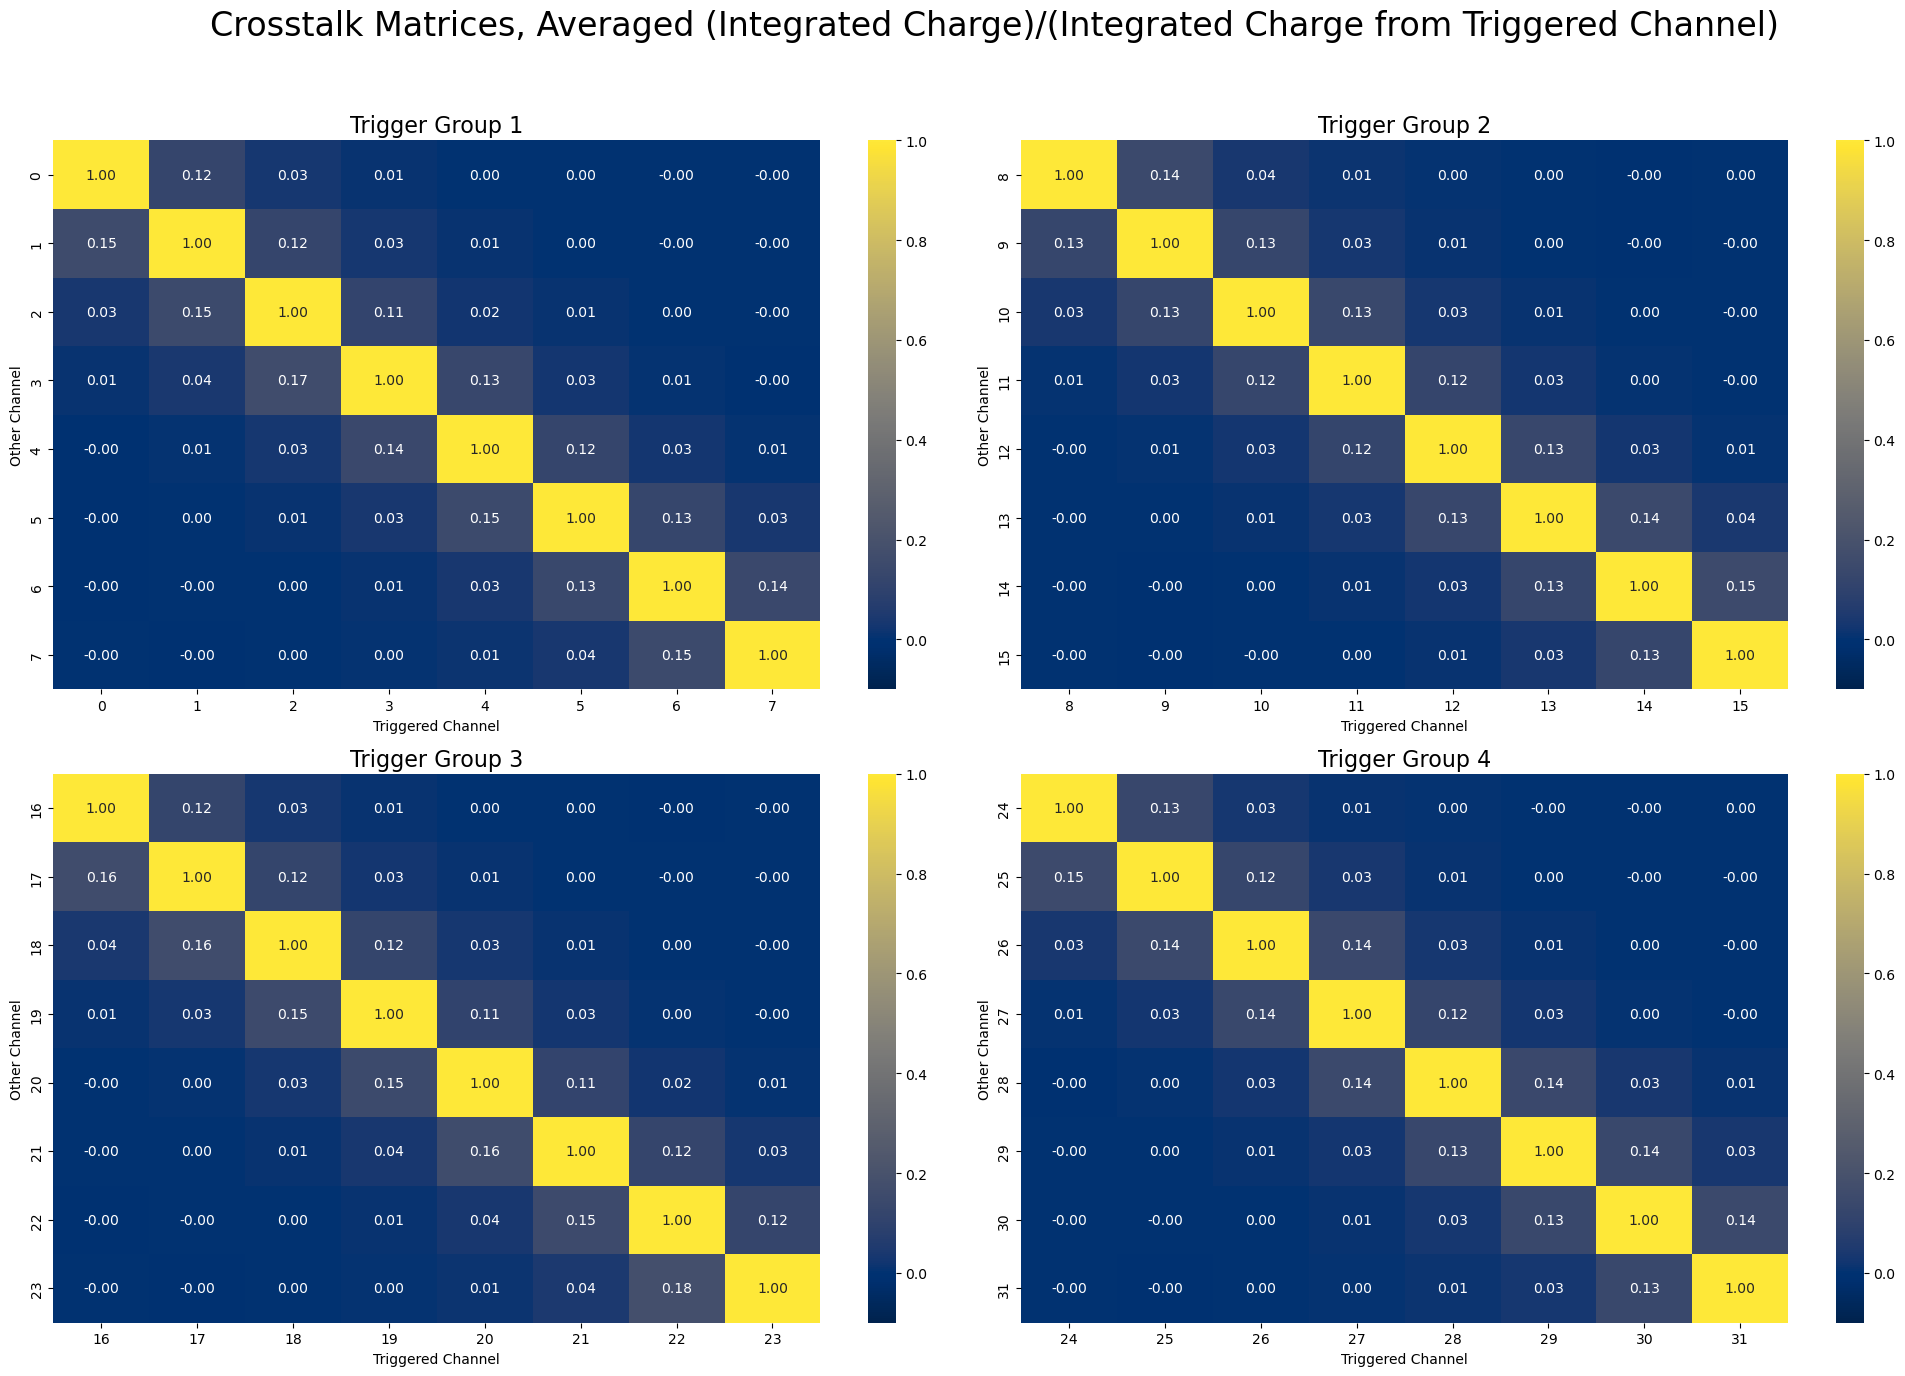

In [ ]:

hdf5List = read_integral_hdf5s.get_hdf5_list(minRunNum=280, maxRunNum=315)
arrs = read_integral_hdf5s.getCrosstalkMatrcies_allFiles(hdf5List)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,14))


sns.heatmap(pd.DataFrame(arrs[0]), cmap='cividis', vmin=-0.1, vmax=1, annot=True, fmt=".2f", ax=ax[0,0])
ax[0,0].set_xlabel("Triggered Channel")
ax[0,0].set_ylabel("Other Channel")
ax[0,0].set_title("Trigger Group 1", fontsize=16)
#ax[0,0].yaxis.get_label().set_visible(True)


sns.heatmap(pd.DataFrame(arrs[1]), cmap='cividis', vmin=-0.1, vmax=1, annot=True, fmt=".2f", ax=ax[0,1])
ax[0,1].set_xlabel("Triggered Channel")
ax[0,1].set_ylabel("Other Channel")
ax[0,1].set_title("Trigger Group 2", fontsize=16)
ax[0,1].set_xticklabels(np.arange(8,16))
ax[0,1].set_yticklabels(np.arange(8,16))
#ax[0,1].set_xticks([8,16,1])


sns.heatmap(pd.DataFrame(arrs[2]), cmap='cividis', vmin=-0.1, vmax=1, annot=True, fmt=".2f", ax=ax[1,0])
ax[1,0].set_xlabel("Triggered Channel")
ax[1,0].set_ylabel("Other Channel")
ax[1,0].set_title("Trigger Group 3", fontsize=16)
ax[1,0].set_xticklabels(np.arange(16,24))
ax[1,0].set_yticklabels(np.arange(16,24))


sns.heatmap(pd.DataFrame(arrs[3]), cmap='cividis', vmin=-0.1, vmax=1, annot=True, fmt=".2f", ax=ax[1,1])
ax[1,1].set_xlabel("Triggered Channel")
ax[1,1].set_ylabel("Other Channel")
ax[1,1].set_title("Trigger Group 4", fontsize=16)
ax[1,1].set_xticklabels(np.arange(24,32))
ax[1,1].set_yticklabels(np.arange(24,32))

plt.suptitle("Crosstalk Matrices, Averaged (Integrated Charge)/(Integrated Charge from Triggered Channel)", fontsize=24, )
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Averaged SPE and SRC Pulses from Triggered Events

In [150]:
import importlib
importlib.reload(read_raw_waveforms_hdf5s)

<module 'read_raw_waveforms_hdf5s' from '/storage/af/user/aalbert/SM_QAQC_Results/Plotting_Scripts/../utils/read_raw_waveforms_hdf5s.py'>

In [151]:
hdf5_file = read_raw_waveforms_hdf5s.get_hdf5_file(runNum=300)
Na_points, Na_vals = read_raw_waveforms_hdf5s.average_waveforms(hdf5_file, ch=0, type='lyso')

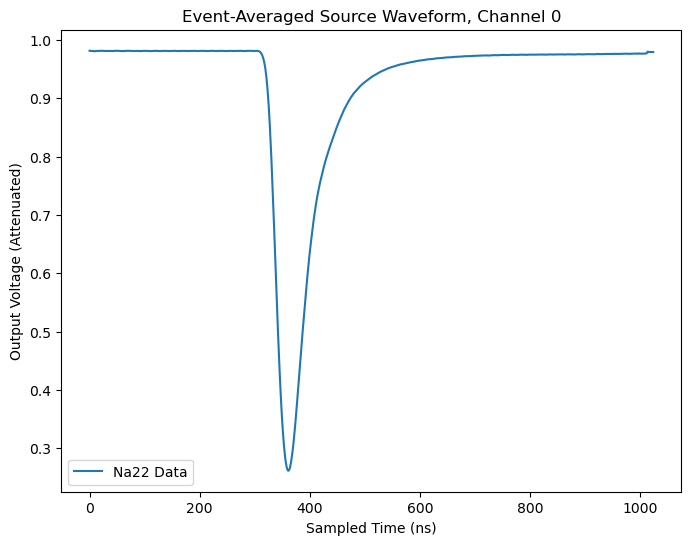

In [152]:
plt.figure(figsize=(8,6))
plt.plot(Na_points, Na_vals, label="Na22 Data")
plt.xlabel("Sampled Time (ns)")
plt.ylabel("Output Voltage (Attenuated)")
plt.title("Event-Averaged Source Waveform, Channel 0")
plt.legend()

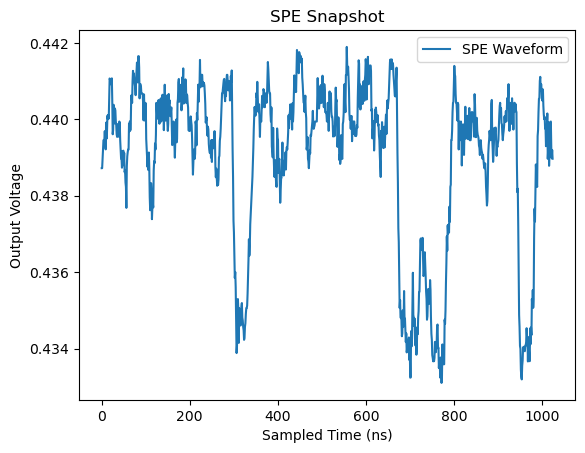

In [153]:
file = h5.File(hdf5_file, 'r')
type='spe'
print()
waveform = file['spe']['ch0'][14]
xinc = 1/(file[type].attrs['drs4_frequency'] * 10**6)
points = file[type].attrs['record_length']
x = np.linspace(0, xinc * points, int(points))
y = waveform/2**12

#plt.figure(figsize=(8,6))
plt.plot(x*1e9, y, label='SPE Waveform')
plt.title("SPE Snapshot")
plt.xlabel("Sampled Time (ns)")
plt.ylabel("Output Voltage")

plt.legend()


